In [1]:
pip install mpl_toolkits.basemap

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [2]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import re
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
tweets=pd.read_csv('tweet_data_region_mumbai.csv')

In [4]:
tweets['text'][1]

'RT @RanaAyyub: Soon after recovering from COVID, Kader Shaikh started work to convert his 30,000 square feet office space at Shreyam comple…'

In [5]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['text'][1]

'RT Soon after recovering from COVID, Kader Shaikh started work to convert his 30,000 square feet office space at Shreyam comple…'

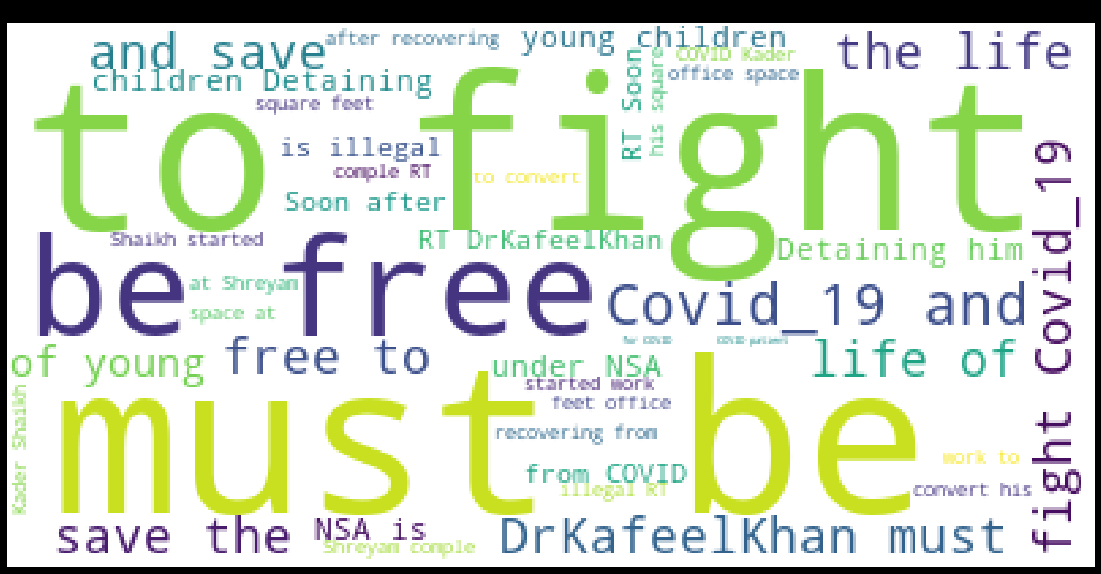

In [6]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("COVID-19_PANDEMIC")
wordcloud(tweets,'text') 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

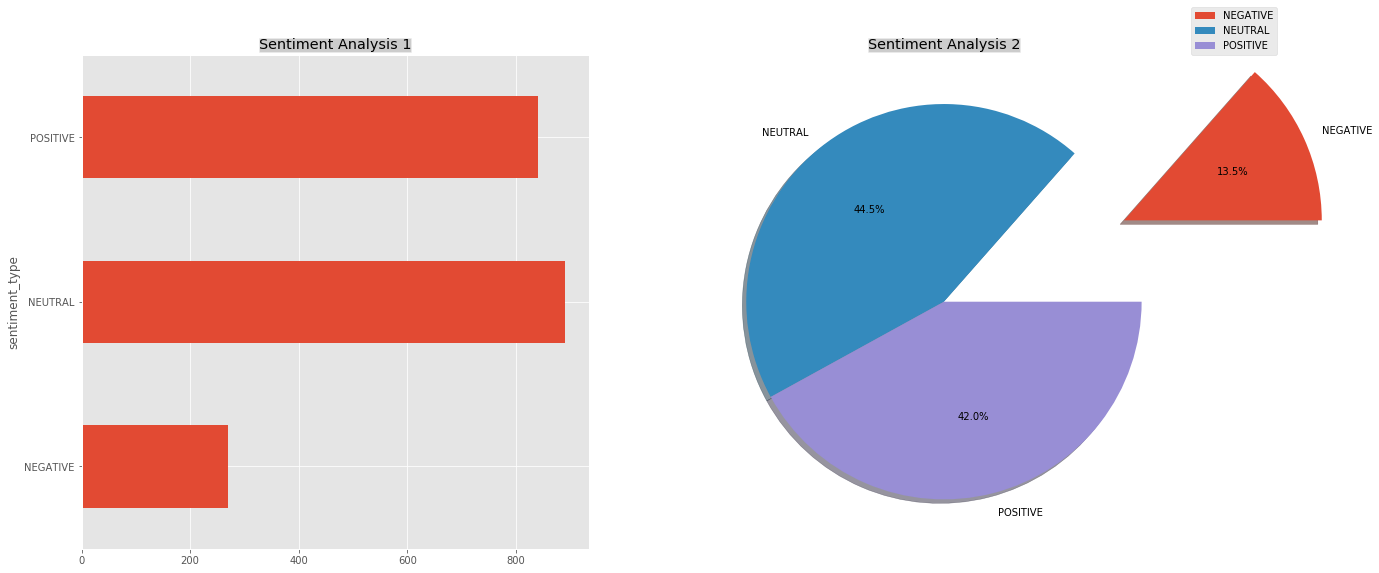

In [10]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [11]:
tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)[0:5]

0    RT Now this is new to know about #Covid_19 inf...
1    Now this is new to know about #Covid_19 infect...
2    RT "80% of the cases are from high rises." Mum...
3    RT Some mild #COVID patients will have symptom...
4    Not a 'pleasant surprise' actually! Based on f...
Name: text, dtype: object

In [12]:
tweets['text_lem'].head()

0    RT Now this is new to know about  Covid    inf...
1    RT Soon after recovering from COVID  Kader Sha...
2    RT  DrKafeelKhan must be free to fight  Covid ...
3    RT India reports        new  Covid   cases    ...
4    After Compliments Chav Tarts  How are you and ...
Name: text_lem, dtype: object

In [32]:
tweets['text_lem'] = tweets['text_lem'].apply((lambda x: re.sub('RT[\s]+','',x)))

In [33]:
tweets['text_lem'] = tweets['text_lem'].apply((lambda x: re.sub('RT','',x)))

In [34]:
nltk.download('words')
stop_words = set(nltk.corpus.words.words())
def rem_stopwords(text):
    word_tokens = text.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    str1 = ""
    # traverse in the string
    for ele in filtered_sentence:
        str1 += ele
        str1 += " "
    str1 = str1[:-1]
    return str1

tweets['text_lem'] = tweets['text_lem'].apply(rem_stopwords)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [35]:
tweets.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,tweetos,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,0,1287255307463217158,RT Now this is new to know about #Covid_19 inf...,0,1,Sun Jul 26 05:15:56 +0000 2020,other,Now Covid infections organs lets,-0.4215,0.877,0.123,0.000,NEGATIVE
1,1,1287255107231350784,"RT Soon after recovering from COVID, Kader Sha...",0,1524,Sun Jul 26 05:15:08 +0000 2020,other,Soon recovering COVID Kader Shaikh started fee...,0.0000,1.000,0.000,0.000,NEUTRAL
2,2,1287255019637501952,RT #DrKafeelKhan must be free to fight #Covid_...,0,556,Sun Jul 26 05:14:47 +0000 2020,other,DrKafeelKhan Covid children Detaining NSA,0.0772,0.572,0.209,0.219,POSITIVE
3,3,1287254966021705730,"RT India reports 48,661 new #Covid19 cases, 70...",0,1,Sun Jul 26 05:14:34 +0000 2020,other,reports Covid cases deaths recoveries hours Tr...,0.0000,1.000,0.000,0.000,NEUTRAL
4,4,1287254937555132417,After Compliments Chav Tarts. How are you and ...,0,0,Sun Jul 26 05:14:27 +0000 2020,@ChavTarts,After Compliments Chav Tarts How COVID Keep,0.4019,0.856,0.000,0.144,POSITIVE


In [36]:
tweets.to_csv('tweet_sentimet_mumbai_region', index = False)

In [37]:
Negative = tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)

In [38]:
Negative = Negative.apply((lambda x: re.sub('RT','',x)))

In [39]:
Negative = Negative.apply((lambda x: re.sub('Covid','',x)))

In [40]:
Negative = Negative.apply(lambda x: x.lower())
Negative = Negative.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [59]:
Negative = Negative.apply((lambda x: re.sub('country','',x)))

In [60]:
nltk.download('words')
stop_words = set(nltk.corpus.words.words())
def rem_stopwords(text):
    word_tokens = text.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    str1 = ""
    # traverse in the string
    for ele in filtered_sentence:
        str1 += ele
        str1 += " "
    str1 = str1[:-1]
    return str1

Negative = Negative.apply(rem_stopwords)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [66]:
Negative = Negative.apply((lambda x: re.sub('country','',x)))
Negative = Negative.apply(lambda x: x.lower())
Negative = Negative.apply((lambda x: re.sub('[^a-zA-z\s]','',x)))
Negative = Negative.apply((lambda x: re.sub('covid','',x)))
Negative = Negative.apply((lambda x: re.sub('RT','',x)))

In [67]:
Negative.head()

0                             _ infections organs lets
1                             _ infections organs lets
2     cases rises mumbais uncovers citys elitism slums
3                         patients symptoms im amp evi
4                                            negatives
Name: text, dtype: object

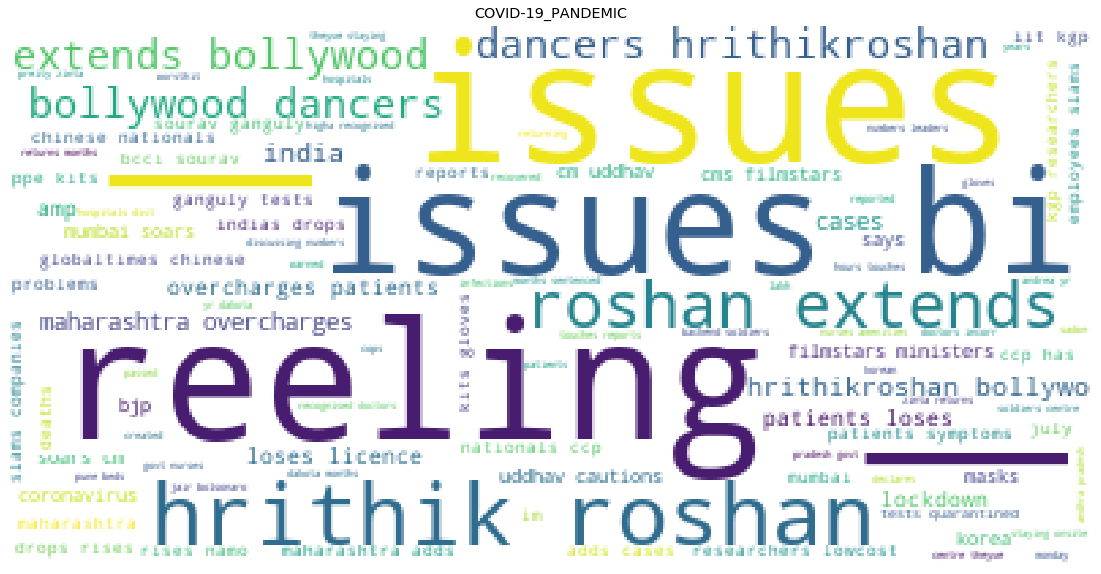

In [68]:
def wordcloud(Negative):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in Negative]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("COVID-19_PANDEMIC")
wordcloud(Negative) 

In [44]:
Positive = tweets[tweets.sentiment_type == 'POSITIVE'].text.reset_index(drop = True)

In [45]:
Positive.head()

0    RT #DrKafeelKhan must be free to fight #Covid_...
1    After Compliments Chav Tarts. How are you and ...
2    After Compliments Chav Tarts. How are you and ...
3    RT #DrKafeelKhan must be free to fight #Covid_...
4    RT #DrKafeelKhan must be free to fight #Covid_...
Name: text, dtype: object

In [46]:
Positive = Positive.apply((lambda x: re.sub('RT','',x)))
Positive = Positive.apply((lambda x: re.sub('country','',x)))
Positive = Positive.apply((lambda x: re.sub('Covid','',x)))

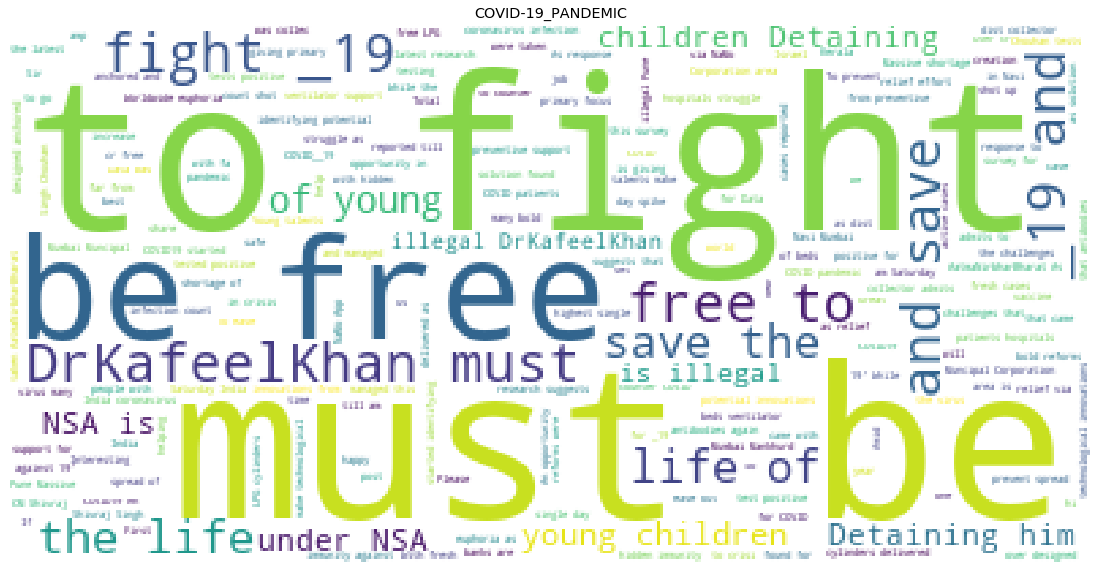

In [57]:
def wordcloud(Positive):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in Positive]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("COVID-19_PANDEMIC")
wordcloud(Positive) 

In [48]:
Neutral = tweets[tweets.sentiment_type == 'NEUTRAL'].text.reset_index(drop = True)

In [49]:
Neutral.head()

0    RT Soon after recovering from COVID, Kader Sha...
1    RT India reports 48,661 new #Covid19 cases, 70...
2    RT Soon after recovering from COVID, Kader Sha...
3    RT PM #NarendraModi will address the nation th...
4    PM #NarendraModi will address the nation throu...
Name: text, dtype: object

In [54]:
Neutral = Neutral.apply(lambda x: x.lower())
Neutral = Neutral.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
Neutral = Neutral.apply((lambda x: re.sub('RT','',x)))
Neutral = Neutral.apply((lambda x: re.sub('country','',x)))
Neutral = Neutral.apply((lambda x: re.sub('covid','',x)))

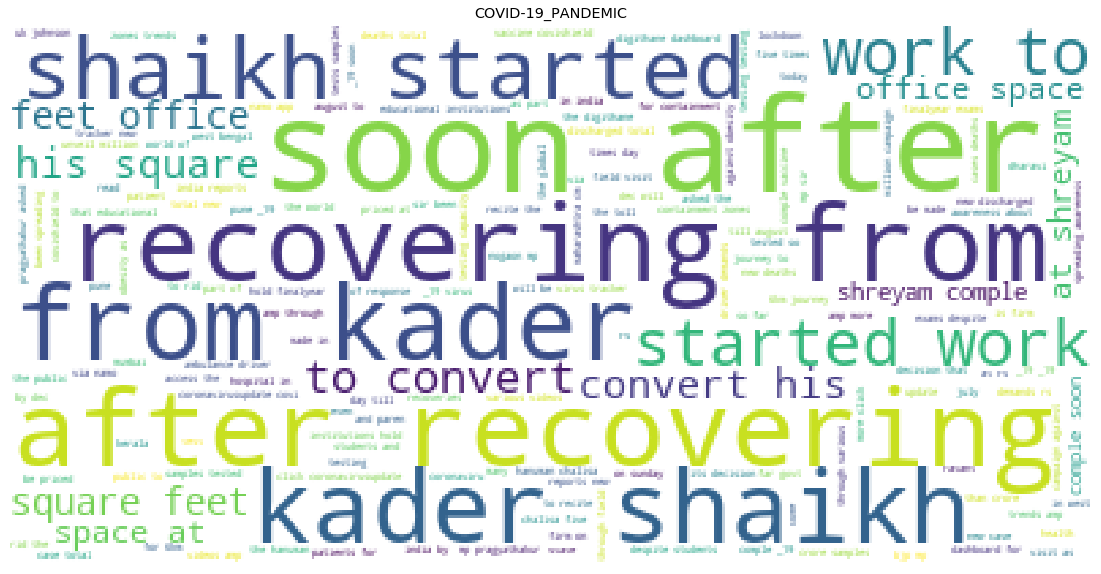

In [58]:
def wordcloud(Neutral):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in Neutral]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("COVID-19_PANDEMIC")
wordcloud(Neutral) 